![Texto](https://dadosaocubo.com/wp-content/uploads/2020/06/DADOS-AO-CUBO-Vers%C3%A3o-04-1.png) 

[__D³__](https://dadosaocubo.com/) by [__Tiago Dias__](https://www.linkedin.com/in/diasctiago/) 

# NLP com scikit-learn

## Importando bibliotecas

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from wordcloud import WordCloud


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Carregando dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/dadosaocubo/nlp/master/base_mercadologica.csv')
df.head(2)

,descricao,departamento
0,"PASTA INT VITAPOWER 1,005KG AMEND/SHOT",MERCEARIA DOCE
1,ESPONJA BETTANIN BRILHUS C/1,CUIDADOS COM A COZINHA


## Criando uma nova coluna

In [ ]:
df['nova_descricao'] = df['descricao'].copy()

## Pontuação

In [ ]:
df['nova_descricao'] = df['nova_descricao'].str.replace('[,.:;!?]+', ' ', regex=True).copy()
df[['descricao','nova_descricao']][df['descricao'].str.contains('!')]

,descricao,nova_descricao
16848,ESC CAB RICCA STICK ME! 247,ESC CAB RICCA STICK ME 247


## Caracteres Especiais

In [ ]:
df['nova_descricao'] = df['nova_descricao'].str.replace('[/<>()|\+\-\$%&#@\'\"]+', ' ', regex=True).copy()
df[['descricao','nova_descricao']][df['descricao'].str.contains('#')]

,descricao,nova_descricao
10030,PALETA SOMBRAS PAYOT #BEM BASIQUINHA 6G,PALETA SOMBRAS PAYOT BEM BASIQUINHA 6G
10285,MASCARA CILIOS PAYOT BOC ROS #MEUVOLM 6G,MASCARA CILIOS PAYOT BOC ROS MEUVOLM 6G
11206,CHOC CHOCK #SEMCULPA 25G-TA 70% CACAU,CHOC CHOCK SEMCULPA 25G TA 70 CACAU
12412,ESMALTE VULT 5FREE #DIVANDO 10 8ML,ESMALTE VULT 5FREE DIVANDO 10 8ML
13045,CHOC CHOCK #SEMCULPA 25G-TA 33% CACAU-TPM,CHOC CHOCK SEMCULPA 25G TA 33 CACAU TPM
20003,KETCHUP STRUMPF #2 380G DEFUMADO,KETCHUP STRUMPF 2 380G DEFUMADO
20791,CHOC CHOCK #SEMCULPA 25G-TA WHEY,CHOC CHOCK SEMCULPA 25G TA WHEY


Números

In [ ]:
df['nova_descricao'] = df['nova_descricao'].str.replace('[0-9]+', '', regex=True)
df[['descricao','nova_descricao']][df['descricao'].str.contains('2170')]

,descricao,nova_descricao
6842,MANTA ACASA N 125X150 AZ 2170-BL 1901,MANTA ACASA N X AZ BL
16529,BOLA NATAL NSW DOU 10CM C/2 SDA72170R10,BOLA NATAL NSW DOU CM C SDAR


## Stop Words

In [ ]:
str(stopwords.words('portuguese'))

"['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'esti

In [ ]:
stop_words = ['em','sao','ao','de','da','do','para','c','kg','un','ml',
              'pct','und','das','no','ou','pc','gr','pt','cm','vd','com',
              'sem','gfa','jg','la','1','2','3','4','5','6','7','8','9',
              '0','a','b','c','d','e','lt','f','g','h','i','j','k','l',
              'm','n','o','p','q','r','s','t','u','v','x','w','y','z']

## Tokenização

In [ ]:
# Não faz parte do problema, somente para visualização
frase = 'Texto exemplo tokenização'
nltk.word_tokenize(frase)

['Texto', 'exemplo', 'tokenização']

## CountVectorizer

In [ ]:
cvt = CountVectorizer(strip_accents='ascii', lowercase=True, stop_words=stop_words)

In [ ]:
# Não faz parte do problema, somente para visualização
# Seleção de dois itens da nossa base de dados
exemplo_descricao = df['nova_descricao'][:2]
exemplo_descricao.values

array(['PASTA INT VITAPOWER  KG AMEND SHOT',
       'ESPONJA BETTANIN BRILHUS C '], dtype=object)

In [ ]:
# Não faz parte do problema, somente para visualização
exemplo_descricao_cvt = cvt.fit_transform(exemplo_descricao)
exemplo_descricao_cvt.toarray()

array([[1, 0, 0, 0, 1, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 0, 0]])

In [ ]:
X_cvt = cvt.fit_transform(df['nova_descricao'])

In [ ]:
tfi = TfidfTransformer(use_idf=True)

In [ ]:
# Não faz parte do problema, somente para visualização
exemplo_descricao_tfi = tfi.fit_transform(exemplo_descricao_cvt)
exemplo_descricao_tfi.toarray()

array([[0.4472136 , 0.        , 0.        , 0.        , 0.4472136 ,
        0.4472136 , 0.4472136 , 0.4472136 ],
       [0.        , 0.57735027, 0.57735027, 0.57735027, 0.        ,
        0.        , 0.        , 0.        ]])

In [ ]:
X_tfi = tfi.fit_transform(X_cvt)

In [ ]:
# A entrada será a transformação de vetores com a normalização tf-idf
entrada = X_tfi
# A saida será os departamentos
saida = df['departamento']
# Separando 20% dos dados para teste
X_train, X_test, y_train, y_test = train_test_split(entrada, saida, test_size=0.2)

In [ ]:
# Criando modelo
clf = LinearSVC()
# Treinamento do modelo
clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
# Realizando a predição
resultado = clf.predict(X_test)
# Avaliando o modelo
print('Acurácia: {:.2f}'.format(metrics.accuracy_score(y_test, resultado)))

Acurácia: 0.95


In [ ]:
# Avaliação completa
print(metrics.classification_report(y_test, resultado))

                          precision    recall  f1-score   support

              AUTOMOTIVO       1.00      0.86      0.92        49
                 AÇOUGUE       0.89      0.99      0.94        86
      BEBIDAS ALCOÓLICAS       0.99      0.99      0.99       253
  BEBIDAS NÃO ALCOÓLICAS       0.97      0.98      0.97       137
               BRINQUEDO       0.93      0.80      0.86        35
                 CALÇADO       1.00      0.99      1.00       133
      CAMA, MESA E BANHO       0.98      1.00      0.99        88
        CONGELADOS DOCES       0.98      0.92      0.95        62
     CONGELADOS SALGADOS       0.95      0.90      0.92        20
    CUIDADOS COM A BARBA       1.00      0.92      0.96        13
     CUIDADOS COM A CASA       0.91      0.92      0.91        99
  CUIDADOS COM A COZINHA       0.86      0.94      0.90        34
    CUIDADOS COM A ROUPA       0.93      1.00      0.96        52
 CUIDADOS COM MÃOS E PÉS       0.97      0.92      0.95        66
 CUIDADOS

In [ ]:
def novo_item(descricao):
  novo_cvt = cvt.transform(pd.Series(descricao))
  novo_tfi = tfi.transform(novo_cvt)
  departamento = clf.predict(novo_tfi)[0]
  return departamento

In [ ]:
# Lista de exemplos de novos produtos
itens = ['FEIJÃO','AÇUCAR','QUEIJO']
# Loop for para fazer a predição do departamento de novos produtos
for item in itens:
  print('Produto:', item, 'Departamento:', novo_item(item))

Produto: FEIJÃO Departamento: MERCEARIA SALGADA
Produto: AÇUCAR Departamento: MERCEARIA DOCE
Produto: QUEIJO Departamento: FRIOS


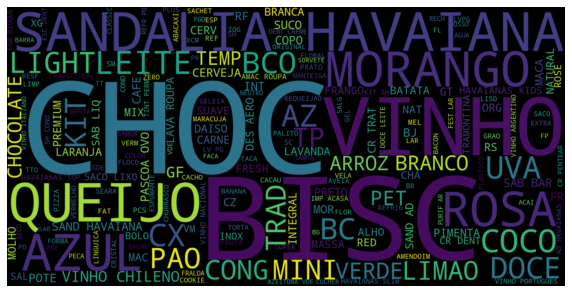

In [ ]:
todos_itens = ' '.join(s for s in df['nova_descricao'].values)

# gerar uma wordcloud
wc = WordCloud(stopwords=stop_words, background_color="black", width=1600, height=800)
wordcloud = wc.generate(todos_itens)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()